In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
GC_data = pd.read_csv('german_credit.csv')

In [4]:
GC_data.head(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes


In [5]:
GC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [44]:
GC_data.shape

(1000, 21)

In [45]:
GC_data.describe().T

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [46]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [47]:
GC_data.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [48]:
GC_data.select_dtypes(include = 'object')

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
0,< 0 DM,critical account/ other credits existing (not ...,domestic appliances,unknown/ no savings account,.. >= 7 years,male : single,none,real estate,none,own,skilled employee / official,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,female : divorced/separated/married,none,real estate,none,own,skilled employee / official,none,yes
2,no checking account,critical account/ other credits existing (not ...,(vacation - does not exist?),... < 100 DM,4 <= ... < 7 years,male : single,none,real estate,none,own,unskilled - resident,none,yes
3,< 0 DM,existing credits paid back duly till now,radio/television,... < 100 DM,4 <= ... < 7 years,male : single,guarantor,if not A121 : building society savings agreeme...,none,for free,skilled employee / official,none,yes
4,< 0 DM,delay in paying off in the past,car (new),... < 100 DM,1 <= ... < 4 years,male : single,none,unknown / no property,none,for free,skilled employee / official,none,yes
5,no checking account,existing credits paid back duly till now,(vacation - does not exist?),unknown/ no savings account,1 <= ... < 4 years,male : single,none,unknown / no property,none,for free,unskilled - resident,"yes, registered under the customers name",yes
6,no checking account,existing credits paid back duly till now,radio/television,500 <= ... < 1000 DM,.. >= 7 years,male : single,none,if not A121 : building society savings agreeme...,none,own,skilled employee / official,none,yes
7,0 <= ... < 200 DM,existing credits paid back duly till now,car (used),... < 100 DM,1 <= ... < 4 years,male : single,none,"if not A121/A122 : car or other, not in attrib...",none,rent,management/ self-employed/ highly qualified em...,"yes, registered under the customers name",yes
8,no checking account,existing credits paid back duly till now,domestic appliances,.. >= 1000 DM,4 <= ... < 7 years,male : divorced/separated,none,real estate,none,own,unskilled - resident,none,yes
9,0 <= ... < 200 DM,critical account/ other credits existing (not ...,car (new),... < 100 DM,unemployed,male : married/widowed,none,"if not A121/A122 : car or other, not in attrib...",none,own,management/ self-employed/ highly qualified em...,none,yes


In [49]:
for col in GC_data.columns:
    print("column Name: ",col)
    print("count: ",GC_data[col].nunique())
    print("unique data:",GC_data[col].unique(),'\n\n')

column Name:  default
count:  2
unique data: [0 1] 


column Name:  account_check_status
count:  4
unique data: ['< 0 DM' '0 <= ... < 200 DM' 'no checking account'
 '>= 200 DM / salary assignments for at least 1 year'] 


column Name:  duration_in_month
count:  33
unique data: [ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40] 


column Name:  credit_history
count:  5
unique data: ['critical account/ other credits existing (not at this bank)'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'no credits taken/ all credits paid back duly'
 'all credits at this bank paid back duly'] 


column Name:  purpose
count:  10
unique data: ['domestic appliances' '(vacation - does not exist?)' 'radio/television'
 'car (new)' 'car (used)' 'business' 'repairs' 'education'
 'furniture/equipment' 'retraining'] 


column Name:  credit_amount
count:  921
unique data: [ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5

In [50]:
# Print Shape of model data
GC_data.shape

(1000, 21)

### Check for highly correlated variables but don't required any treatment for this use case

In [51]:
GC_data.corr().abs()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
default,1.000000,0.214927,0.154739,0.072404,0.002967,0.091127,0.045732,0.003015
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,0.036136,0.011284,0.023834
credit_amount,0.154739,0.624984,1.000000,0.271316,0.028926,0.032716,0.020795,0.017142
installment_as_income_perc,0.072404,0.074749,0.271316,1.000000,0.049302,0.058266,0.021669,0.071207
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,0.091127,0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
credits_this_bank,0.045732,0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
people_under_maintenance,0.003015,0.023834,0.017142,0.071207,0.042643,0.118201,0.109667,1.000000


In [52]:
GC_data.var()

default                       2.102102e-01
duration_in_month             1.454150e+02
credit_amount                 7.967843e+06
installment_as_income_perc    1.251523e+00
present_res_since             1.218193e+00
age                           1.294013e+02
credits_this_bank             3.336847e-01
people_under_maintenance      1.311061e-01
dtype: float64

In [53]:
corr = GC_data.where(np.triu(np.ones(GC_data.shape), k=1).astype(np.bool))
corr

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,NaN,< 0 DM,6.0,critical account/ other credits existing (not ...,domestic appliances,1169.0,unknown/ no savings account,.. >= 7 years,4.0,male : single,...,4.0,real estate,67.0,none,own,2.0,skilled employee / official,1.0,"yes, registered under the customers name",yes
1,NaN,NaN,48.0,existing credits paid back duly till now,domestic appliances,5951.0,... < 100 DM,1 <= ... < 4 years,2.0,female : divorced/separated/married,...,2.0,real estate,22.0,none,own,1.0,skilled employee / official,1.0,none,yes
2,NaN,NaN,NaN,critical account/ other credits existing (not ...,(vacation - does not exist?),2096.0,... < 100 DM,4 <= ... < 7 years,2.0,male : single,...,3.0,real estate,49.0,none,own,1.0,unskilled - resident,2.0,none,yes
3,NaN,NaN,NaN,NaN,radio/television,7882.0,... < 100 DM,4 <= ... < 7 years,2.0,male : single,...,4.0,if not A121 : building society savings agreeme...,45.0,none,for free,1.0,skilled employee / official,2.0,none,yes
4,NaN,NaN,NaN,NaN,NaN,4870.0,... < 100 DM,1 <= ... < 4 years,3.0,male : single,...,4.0,unknown / no property,53.0,none,for free,2.0,skilled employee / official,2.0,none,yes
5,NaN,NaN,NaN,NaN,NaN,NaN,unknown/ no savings account,1 <= ... < 4 years,2.0,male : single,...,4.0,unknown / no property,35.0,none,for free,1.0,unskilled - resident,2.0,"yes, registered under the customers name",yes
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.. >= 7 years,3.0,male : single,...,4.0,if not A121 : building society savings agreeme...,53.0,none,own,1.0,skilled employee / official,1.0,none,yes
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,male : single,...,2.0,"if not A121/A122 : car or other, not in attrib...",35.0,none,rent,1.0,management/ self-employed/ highly qualified em...,1.0,"yes, registered under the customers name",yes
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male : divorced/separated,...,4.0,real estate,61.0,none,own,1.0,unskilled - resident,1.0,none,yes
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,"if not A121/A122 : car or other, not in attrib...",28.0,none,own,2.0,management/ self-employed/ highly qualified em...,1.0,none,yes


In [54]:
corr.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

### Drop the original variables which are converted to dummy

In [7]:
model_data = GC_data.select_dtypes(exclude=['object'])
model_data.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
0,0,6,1169,4,4,67,2,1
1,1,48,5951,2,2,22,1,1
2,0,12,2096,2,3,49,1,2
3,0,42,7882,2,4,45,1,2
4,1,24,4870,3,4,53,2,2


In [8]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
default                       1000 non-null int64
duration_in_month             1000 non-null int64
credit_amount                 1000 non-null int64
installment_as_income_perc    1000 non-null int64
present_res_since             1000 non-null int64
age                           1000 non-null int64
credits_this_bank             1000 non-null int64
people_under_maintenance      1000 non-null int64
dtypes: int64(8)
memory usage: 62.6 KB


In [9]:
model_data.shape

(1000, 8)

In [12]:
model_data.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


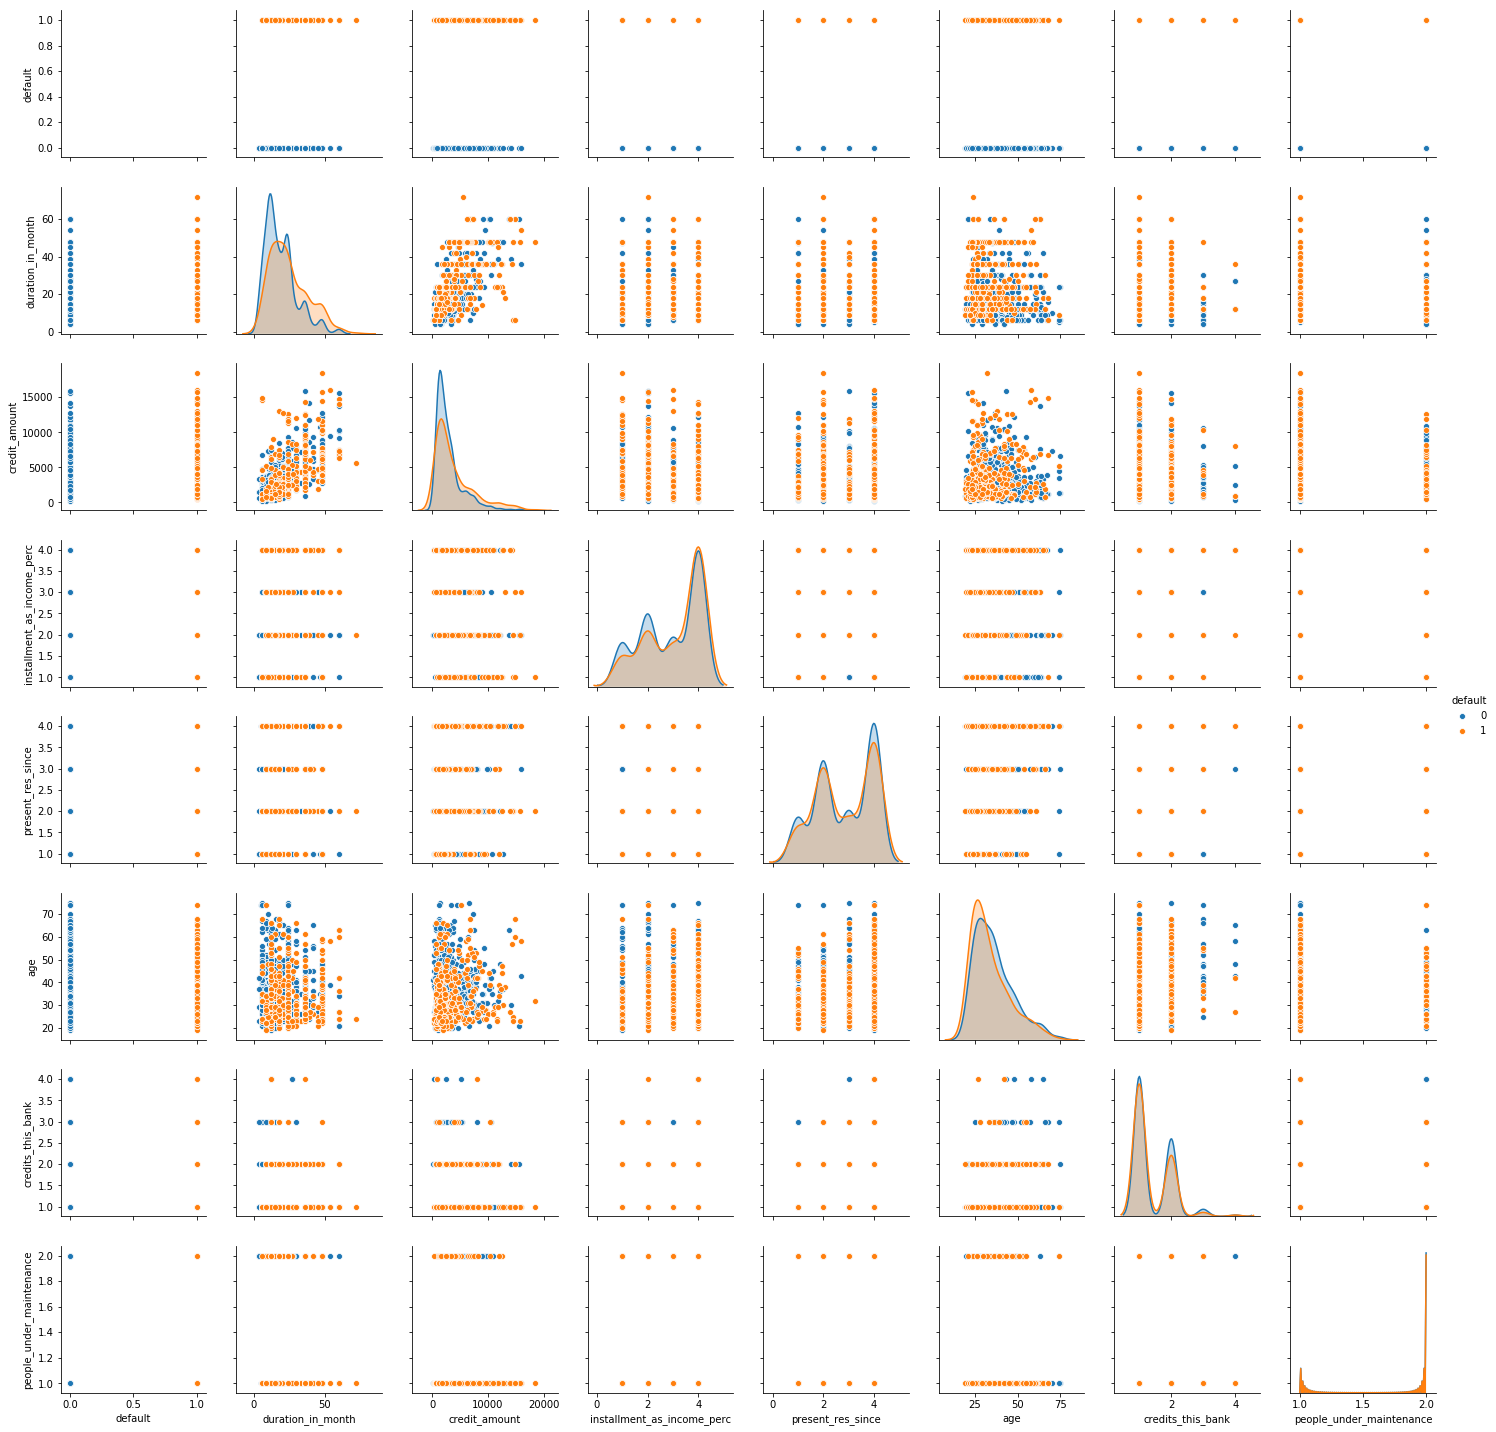

In [10]:
sns.pairplot(model_data , hue='default' , diag_kind = 'kde')

In [52]:
corr = model_data.corr()
corr

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


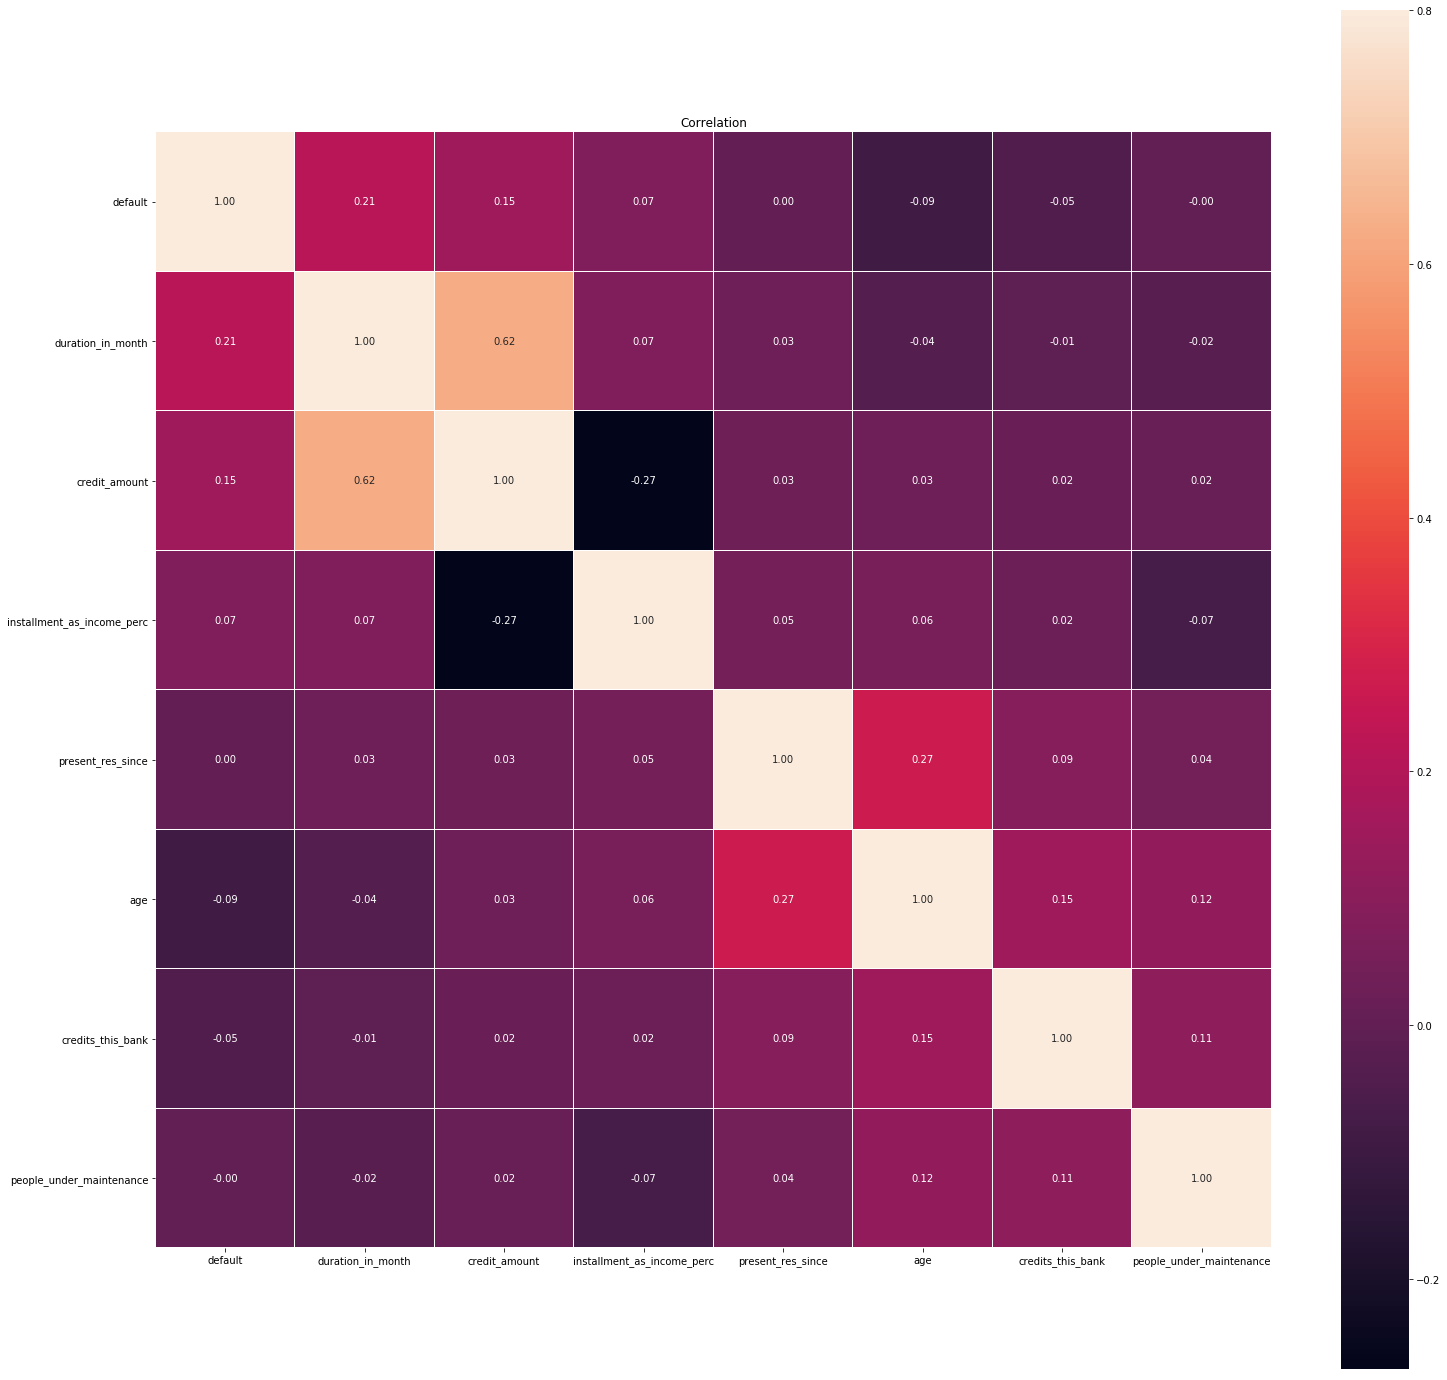

In [53]:
plt.figure(figsize = (25,25))
sns.heatmap(model_data.corr(), vmax=0.8, square=True, fmt='.2f',annot = True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
model_data.head(1)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
0,0,6,1169,4,4,67,2,1


In [15]:
X = model_data.drop("default" , axis=1)
y = model_data['default']

In [16]:
print(X.shape)
print(y.shape)

(1000, 7)
(1000,)


In [17]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
randForModel = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)

In [21]:
randForModel = randForModel.fit(train_set, train_labels)

In [22]:
y_predict = randForModel.predict(test_set)

In [23]:
print(randForModel.score(test_set , test_labels))

0.72


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [26]:
from sklearn import metrics

In [27]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[188  26]
 [ 58  28]]


In [28]:
model_data.head(1)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
0,0,6,1169,4,4,67,2,1


In [31]:
print(metrics.accuracy_score(test_labels, y_predict))

0.72


### Q6 Show the list of the features importance( 1 Marks)

In [32]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier as ET

In [33]:
print(pd.DataFrame(randForModel.feature_importances_, columns = ["Imp"], index = train_set.columns))

                                 Imp
duration_in_month           0.191778
credit_amount               0.333290
installment_as_income_perc  0.067890
present_res_since           0.083672
age                         0.250596
credits_this_bank           0.047919
people_under_maintenance    0.024855


In [54]:
model = ET()
model.fit(X, y)
print(model.feature_importances_)

[0.18804351 0.30156833 0.07796801 0.09640355 0.26176525 0.05258595
 0.0216654 ]


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [35]:
# Use below values
num_folds = 10
seed = 77

In [31]:
#Validate the Random Forest model build above using k fold

In [36]:
k_fold = KFold(n_splits=num_folds, random_state=seed)

In [38]:
ffold_data = cross_val_score(randForModel, X, y, cv=k_fold, scoring='accuracy')

In [39]:
print(ffold_data)

[0.78 0.67 0.68 0.75 0.74 0.62 0.71 0.77 0.67 0.7 ]


In [36]:
#Calculate Mean score

In [40]:
ffold_data.mean()

0.7090000000000001

In [38]:
# Calculate score standard deviation using std()

In [43]:
ffold_data.std()

0.04825971404805461

In [44]:
ffold_data.std() * 10

0.48259714048054614

# Q8 Print the confusion matrix( 1 Marks)

In [45]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[188  26]
 [ 58  28]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [47]:
print(metrics.classification_report(test_labels, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       214
           1       0.52      0.33      0.40        86

   micro avg       0.72      0.72      0.72       300
   macro avg       0.64      0.60      0.61       300
weighted avg       0.69      0.72      0.70       300



[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [48]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [49]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(train_set, train_labels)
    randForModel.fit(X_, y_)
    y_pred = randForModel.predict(test_set)
    
    acc = accuracy_score(y_pred, test_labels)
    print(acc)
    accuracy.append(acc)

0.6766666666666666
0.73
0.6766666666666666
0.71
0.7133333333333334
0.7
0.73
0.7166666666666667
0.6833333333333333
0.72


In [50]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7056666666666668
Standard deviation:  0.019496438421186348
